# Homework 5
Evelina Teran & Kevin Smith

In [ ]:
import numpy as np
import pandas as pd
import platform
import os
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Lorenz Loss:
# if(x >1): 0
# else: ln(1+(x-1)**2)

## Question 1

In [ ]:
data_direc = os.getcwd() + "/"
if platform.system() == "Windows":
    data_direc = data_direc.replace("/", "\\")
train = pd.read_csv(data_direc + "gisette_train.csv")
train_labels = pd.read_csv(data_direc + "gisette_train_labels.csv")
test = pd.read_csv(data_direc + "gisette_valid.csv")
test_labels = pd.read_csv(data_direc + "gisette_valid_labels.csv")
train = np.delete(train, 5000, axis=1)
test = np.delete(test, 5000, axis=1)

ValueError: shapes (6000,10) and (5000,) not aligned: 10 (dim 1) != 5000 (dim 0)

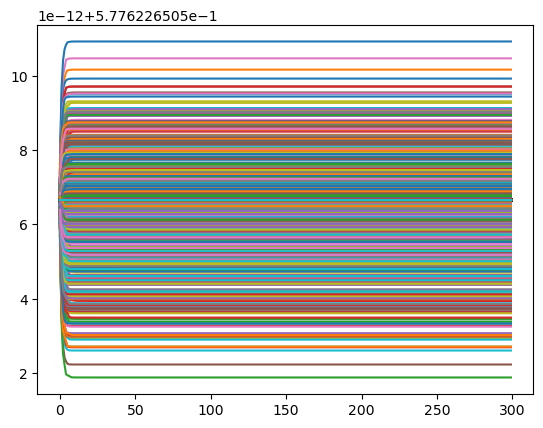

In [21]:
# Normalize the data
scaler = StandardScaler()
train_normalized = scaler.fit_transform(train)
test_normalized = scaler.transform(test)

# Define parameters
s = 0.001
mu = 300
N_iter = 300
# Define k values
k_values = [10, 30, 100, 300, 500]

# Initialize lists to store results
train_errors = []
test_errors = []
roc_aucs = []

for k in k_values:
    # Initialize beta, gamma, and selected variables
    beta = np.zeros(train_normalized.shape[1])
    gamma = np.zeros(train_normalized.shape[1])
    selected_vars = []

    # FSA algorithm with modification to record the loss
    losses_k = []  # To store the training loss for k
    for _ in range(N_iter):
        loss = 0  # Initialize loss for this iteration
        for j in range(train_normalized.shape[1]):
            gamma_j = gamma[j] + mu * beta[j]
            beta_j = beta.copy()
            beta_j[j] = 0
            z = np.dot(train_normalized, beta_j)
            yz = np.multiply(train_labels.values.flatten(), z)
            l_prime = np.where(yz > 1, 0, -2 * (yz - 1) / (1 + (yz - 1) ** 2))
            gradient_j = np.mean(np.multiply(l_prime, train_normalized[:, j])) + 2 * s * beta[j]
            gamma[j] = gamma_j - mu * gradient_j
            beta[j] -= mu * gradient_j  # Update beta with gradient descent step
            if (yz <= 1).all():
                loss += np.log(1 + (yz - 1) ** 2)

        losses_k.append(loss / len(train_normalized))

    # Plot training loss vs iteration number for k
    plt.plot(losses_k, label='Training loss (k=%d)' % k)

    # Select the top k features based on the FSA algorithm for ROC curve
    selected_vars_k = np.argsort(np.abs(gamma))[-k:]
    train_selected_k = train_normalized[:, selected_vars_k]
    test_selected_k = test_normalized[:, selected_vars_k]

    # Use the existing logistic regression model with k features for predictions
    train_pred_prob_k = np.dot(train_selected_k, beta)
    test_pred_prob_k = np.dot(test_selected_k, beta)

    # Calculate the false positive rate (fpr) and true positive rate (tpr) for the ROC curve
    fpr_k, tpr_k, _ = roc_curve(test_labels, test_pred_prob_k)

    # Calculate the ROC AUC score
    roc_auc_k = auc(fpr_k, tpr_k)

    # Store the misclassification error and ROC AUC score
    train_error_k = np.mean(np.abs(np.sign(train_pred_prob_k) - train_labels.values.flatten()) / 2)
    test_error_k = np.mean(np.abs(np.sign(test_pred_prob_k) - test_labels.values.flatten()) / 2)
    train_errors.append(train_error_k)
    test_errors.append(test_error_k)
    roc_aucs.append(roc_auc_k)

# Plot training loss vs iteration number for each k
plt.xlabel('Iteration number')
plt.ylabel('Training loss')
plt.title('Training loss vs iteration number for different k')
plt.legend()
plt.show()

# Plot misclassification error vs k
plt.plot(k_values, train_errors, label='Training error')
plt.plot(k_values, test_errors, label='Test error')
plt.xlabel('Number of features (k)')
plt.ylabel('Misclassification error')
plt.title('Misclassification error vs k')
plt.legend()
plt.show()

# Plot ROC AUC vs k
plt.plot(k_values, roc_aucs)
plt.xlabel('Number of features (k)')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs k')
plt.show()


In [ ]:
# Assume train and test data are already defined
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

# Define k values
k_values = [10, 30, 100, 300, 500]

# Perform FSA
train_errors, test_errors, train_roc_auc, test_roc_auc, fpr_train, tpr_train, fpr_test, tpr_test = fsa(train, train_labels, test, test_labels, k_values)

# Plot ROC curves
num_features_values = [10, 30, 100, 300, 500]
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, num_features in enumerate(num_features_values):
    ax = axs[i // 3, i % 3]
    ax.plot(fpr_train[i], tpr_train[i], label="Training ROC Curve (AUC = {:.2f})".format(train_roc_auc[i]))
    ax.plot(fpr_test[i], tpr_test[i], label="Test ROC Curve (AUC = {:.2f})".format(test_roc_auc[i]))
    ax.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"ROC Curve for {num_features} features")
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

## Question 2

In [ ]:
train = pd.read_csv(data_direc + "dexter_train.csv", header = None)
train_labels = pd.read_csv(data_direc + "dexter_train_labels.csv", header = None)
test = pd.read_csv(data_direc + "dexter_valid.csv", header = None)
test_labels = pd.read_csv(data_direc + "dexter_valid_labels.csv", header = None)

In [ ]:
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

## Question 3

In [ ]:
train = pd.read_fwf(data_direc + "madelon_train.data", header = None)
train_labels = pd.read_fwf(data_direc + "madelon_train.labels", header = None)
test = pd.read_fwf(data_direc + "madelon_valid.data", header = None)
test_labels = pd.read_fwf(data_direc + "madelon_valid.labels", header = None)

In [ ]:
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)